# Computer Vision CSCI-GA.2272-001 Assignment 1

## Introduction

This assignment is an introduction to using PyTorch for training simple neural net models. Two different datasets will be used: 
- MNIST digits [handwritten digits]
- CIFAR-10 [32x32 resolution color images of 10 object classes].

## Requirements

You should perform this assignment in PyTorch, modify this ipython notebook

To install PyTorch, follow instructions at http://pytorch.org/

Please email your assignment to the graders: Yi-Hsiang Kao (ykh342@nyu.edu) and Anshul Sharma (as10950@nyu.edu).

## Warmup [10%]

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand.

MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. 

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes
(airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). 
The train/test split is 50k/10k.

Use `matplotlib` and ipython notebook's visualization capabilities to display some of these images.
[See this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) for hints on how to achieve this.

** Relevant Cell: "Data Loading" **

## Training a Single Layer Network on MNIST [20%]

Start by running the training on MNIST.
By default if you run this notebook successfully, it will train on MNIST.

This will initialize a single layer model train it on the 50,000 MNIST training images for 10 epochs (passes through the training data). 

The loss function [cross_entropy](http://pytorch.org/docs/master/nn.html?highlight=cross_entropy#torch.nn.functional.cross_entropy) computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given `target`.

The default values for the learning rate, batch size and number of epochs are given in the "options" cell of this notebook. 
Unless otherwise specified, use the default values throughout this assignment. 

Note the decrease in training loss and corresponding decrease in validation errors.

Paste the output into your report.
(a): Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. Grab a screenshot of the figure and include it in your report. (Hint threads: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) [#2](https://github.com/pytorch/vision#utils) )

(b): Reduce the number of training examples to just 50. [Hint: limit the iterator in the `train` function]. 
Paste the output into your report and explain what is happening to the model.

## Training a Multi-Layer Network on MNIST [20%]

- Add an extra layer to the network with 1000 hidden units and a `tanh` non-linearity. [Hint: modify the `Net` class]. Train the model for 10 epochs and save the output into your report.
-  Now set the learning rate to 10 and observe what happens during training. Save the output in your report and give a brief explanation

## Training a Convolutional Network on CIFAR [50%]

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling.
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling.
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

Train it for 20 epochs on the CIFAR-10 training set and copy the output
into your report, along with a image of the first layer filters.

Hints: [Follow the first PyTorch tutorial](http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py) or look at the [MNIST example](https://github.com/pytorch/examples/tree/master/mnist)

- Give a breakdown of the parameters within the above model, and the overall number.

In [2]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [74]:
# options
dataset = 'cifar10'# options: 'mnist' | 'cifar10'
# dataset = 'mnist'
batch_size = 64   # input batch size for training
epochs = 2       # number of epochs to train
lr = 0.01        # learning rate

In [75]:
# Data Loading
# Warning: this cell might take some time when you run it for the first time, 
#          because it will download the datasets from the internet
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)
    classes = (0,1,2,3,4,5,6,7,8,9)
    
elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)
    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<built-in method type of Tensor object at 0x7f9f13172f78>
torch.Size([64, 1, 28, 28])


array([[9, 3, 4, 4, 0, 1, 1, 7],
       [0, 3, 0, 9, 0, 3, 4, 0],
       [1, 3, 3, 8, 4, 9, 2, 8],
       [6, 3, 7, 9, 3, 2, 8, 2],
       [9, 1, 8, 9, 2, 8, 8, 1],
       [9, 2, 7, 0, 4, 2, 8, 3],
       [6, 3, 3, 1, 9, 3, 4, 9],
       [5, 7, 5, 0, 2, 7, 1, 1]])

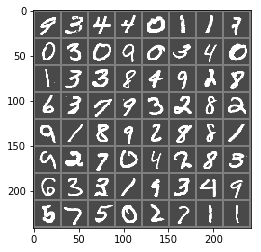

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision 

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
data_iter = iter(train_loader)

images, labels = data_iter.next()
# show images
print(images.type)
print(images.shape)
imshow(torchvision.utils.make_grid(images))

# print labels
batch_lables = [classes[labels[j]] for j in range(batch_size)]
batch_lables = np.array(batch_lables)
batch_lables.reshape(8,8)

In [76]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [77]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))




In [78]:
for epoch in range(1, epochs + 1):
    train(epoch)
    test()

/home/riken/NYU/Fall18/computer_vision/cv-env/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]


Train Epoch: 1 [0/50000 (0%)]	Loss: 2.329983
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.866238
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.786039
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.756376
Train Epoch: 1 [25600/50000 (51%)]	Loss: 2.036746
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.922229
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.818386
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.725936


/home/riken/NYU/Fall18/computer_vision/cv-env/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/home/riken/NYU/Fall18/computer_vision/cv-env/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/riken/NYU/Fall18/computer_vision/cv-env/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Test set: Average loss: 1.8030, Accuracy: 3660/10000 (36%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.632316
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.764532
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.817577
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.733942
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.962660
Train Epoch: 2 [32000/50000 (64%)]	Loss: 2.002954
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.714506
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.845220

Test set: Average loss: 1.7612, Accuracy: 3887/10000 (38%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 1.732350
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.627617
Train Epoch: 3 [12800/50000 (26%)]	Loss: 1.599776
Train Epoch: 3 [19200/50000 (38%)]	Loss: 1.664687
Train Epoch: 3 [25600/50000 (51%)]	Loss: 1.461879
Train Epoch: 3 [32000/50000 (64%)]	Loss: 1.675507
Train Epoch: 3 [38400/50000 (77%)]	Loss: 1.672836
Train Epoch: 3 [44800/50000 (90%)]	Loss: 1.454496

Test set: Average loss: 1.7418, Accuracy: 3983/10000 (39%)

Train Epoch: 4 [0/50000 (0%)]

KeyboardInterrupt: 

In [17]:
# plot out the network weights as images
def vistensor(tensor, ch=0, allkernels=True, nrow=10, padding=1): 
    '''
    vistensor: visuzlization tensor
        @ch: visualization channel 
        @allkernels: visualization all tensores
    ''' 
    
    n,c,w,h = tensor.shape
    if allkernels: tensor = tensor.view(n*c,-1,w,h )
    elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)
        
    rows = np.min( (tensor.shape[0]//nrow + 1, 64 )  )    
    grid = torchvision.utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    plt.figure( figsize=(nrow,rows) )
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

def savetensor(tensor, filename, ch=0, allkernels=False, nrow=10, padding=2):
    '''
    savetensor: save tensor
        @filename: file name
        @ch: visualization channel 
        @allkernels: visualization all tensores
    '''    

    n,c,w,h = tensor.shape
    if allkernels: tensor = tensor.view(n*c,-1,w,h )
    elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)    
    torchvision.utils.save_image(tensor, filename, nrow=nrow )

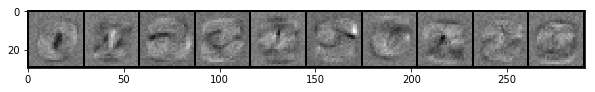

In [18]:
# print(network.state_dict().keys())
linear_weights = network.state_dict()['linear.weight']
# print(linear_weights.size())

weights = torch.reshape(linear_weights,(10,1,28,28))
# print(weights.size())

vistensor(weights, ch=0, allkernels=True)
savetensor(weights,'linear_weights.png', allkernels=True)

**Part 2**

In [29]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

In [30]:
network_new = Net(num_inputs, num_outputs)
optimizer_new = optim.SGD(network_new.parameters(), lr=lr)

In [31]:
def train_new(epoch):
    network_new.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data[:50]), Variable(target[:50])
        optimizer_new.zero_grad()
        output = network_new(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer_new.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))
        if batch_idx == 0:
            break

def test_new():
    network_new.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = network_new(data)
        test_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [32]:
for epoch in range(1, epochs + 1):
    train_new(epoch)
    test_new()

/home/riken/NYU/Fall18/computer_vision/cv-env/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]
/home/riken/NYU/Fall18/computer_vision/cv-env/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/home/riken/NYU/Fall18/computer_vision/cv-env/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/riken/NYU/Fall18/computer_vision/cv-env/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.541266

Test set: Average loss: 2.3420, Accuracy: 1126/10000 (11%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.300703

Test set: Average loss: 2.2306, Accuracy: 1712/10000 (17%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.098751

Test set: Average loss: 2.1348, Accuracy: 2449/10000 (24%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.924993

Test set: Average loss: 2.0503, Accuracy: 3122/10000 (31%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 1.773217

Test set: Average loss: 1.9749, Accuracy: 3683/10000 (36%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 1.639289

Test set: Average loss: 1.9074, Accuracy: 4115/10000 (41%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 1.520330

Test set: Average loss: 1.8468, Accuracy: 4465/10000 (44%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 1.414183

Test set: Average loss: 1.7924, Accuracy: 4714/10000 (47%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 1.319127

Test set: Average loss: 1.7433, Accuracy: 4919/10000 (49%)

Train Epoch: 10 [0/60000 (0%)]	Loss: 1.233727


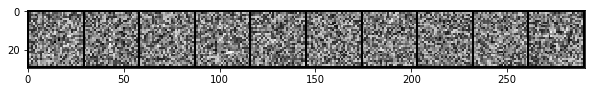

In [33]:
# print(network.state_dict().keys())
linear_weights = network_new.state_dict()['linear.weight']
# print(linear_weights.size())

weights = torch.reshape(linear_weights,(10,1,28,28))
# print(weights.size())

vistensor(weights, ch=0, allkernels=True)
savetensor(weights,'linear_weights_new.png', allkernels=True)

**Part 3**

In [49]:
## network and optimizer (Multi-Layer)
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs
hidden_layer_n = 1000

class MultiLayerNet(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(MultiLayerNet, self).__init__()
        self.linear1 = nn.Linear(num_inputs, hidden_layer_n)
        self.linear2 = nn.Linear(hidden_layer_n, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear1(input)
        output = nn.functional.tanh(output)
        output = self.linear2(output)
        
        return output

multilayer_network = MultiLayerNet(num_inputs, num_outputs)
multilayer_optimizer = optim.SGD(multilayer_network.parameters(), lr=lr)

In [50]:
def train_ml(epoch):
    multilayer_network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        multilayer_optimizer.zero_grad()
        output = multilayer_network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        multilayer_optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))

def test_ml():
    multilayer_network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = multilayer_network(data)
        test_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [51]:
for epoch in range(1, epochs + 1):
    train_ml(epoch)
    test_ml()

/home/riken/NYU/Fall18/computer_vision/cv-env/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/riken/NYU/Fall18/computer_vision/cv-env/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.368009
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.639229
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.522380
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.482239
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.347429
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.425806
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.277817
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.455104
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.411125
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.431901


/home/riken/NYU/Fall18/computer_vision/cv-env/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/home/riken/NYU/Fall18/computer_vision/cv-env/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/riken/NYU/Fall18/computer_vision/cv-env/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Test set: Average loss: 0.3241, Accuracy: 9079/10000 (90%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.271903
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.273489
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.261835
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.350308
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.233295
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.349252
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.209037
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.397713
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.343005
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.426413

Test set: Average loss: 0.2819, Accuracy: 9198/10000 (91%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.204663
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.248715
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.209896
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.304851
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.205887
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.320475
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.181163
Train Epoch: 3 [44800/60000 (75%)]	Loss:

In [79]:
## network and optimizer (CNN)
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
#         torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)
#         torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
#         torch.nn.Linear(in_features, out_features, bias=True)
#         Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
#         2 by 2 max pooling.
#         Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
#         2 by 2 max pooling.
#         Flatten to vector.
#         Linear layer with 64 hidden units + Tanh nonlinearity.
#         Linear layer to 10 output units.
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(3,16,5) #self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(16,128,5) #self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(128 * 5 * 5, 64) #self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(64, 10)
#         self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.tanh(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.tanh(self.conv2(x)), (2,2))
        x = x.view(-1, self.num_flat_features(x))
        x = F.tanh(self.fc1(x)) #x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
convolutional_neural_network = CNN()
cnn_optimizer = optim.SGD(convolutional_neural_network.parameters(), lr=lr)

In [80]:

def train_CNN(epoch):
    convolutional_neural_network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        cnn_optimizer.zero_grad()
        output = convolutional_neural_network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        cnn_optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))

def test_CNN():
    convolutional_neural_network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = convolutional_neural_network(data)
        test_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [81]:
for epoch in range(1, epochs + 1):
    train_CNN(epoch)
    test_CNN()

/home/riken/NYU/Fall18/computer_vision/cv-env/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/riken/NYU/Fall18/computer_vision/cv-env/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  


Train Epoch: 1 [0/50000 (0%)]	Loss: 2.303678
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.136883
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.101333
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.929760
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.932539
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.953855
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.850934
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.945940


/home/riken/NYU/Fall18/computer_vision/cv-env/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/home/riken/NYU/Fall18/computer_vision/cv-env/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/riken/NYU/Fall18/computer_vision/cv-env/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Test set: Average loss: 1.7907, Accuracy: 3832/10000 (38%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.759125
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.885303
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.584472
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.744139
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.568099
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.693180
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.671553
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.831152

Test set: Average loss: 1.5917, Accuracy: 4321/10000 (43%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 1.686413
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.504746


KeyboardInterrupt: 

In [82]:
# print(network.state_dict().keys())
linear_weights = convolutional_neural_network.state_dict()['linear.weight']

weights = torch.reshape(linear_weights,(10,1,28,28))

vistensor(weights, ch=0, allkernels=True)
savetensor(weights,'linear_weights_new.png', allkernels=True)

KeyError: 'linear.weight'

In [ ]:
print(convolutional_neural_network)

In [83]:
from torchsummary import summary
summary(convolutional_neural_network, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]           1,216
            Conv2d-2          [-1, 128, 10, 10]          51,328
            Linear-3                   [-1, 64]         204,864
            Linear-4                   [-1, 10]             650
Total params: 258,058
Trainable params: 258,058
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.19
Params size (MB): 0.98
Estimated Total Size (MB): 1.19
----------------------------------------------------------------


/home/riken/NYU/Fall18/computer_vision/cv-env/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


torch.Size([16, 3, 5, 5])


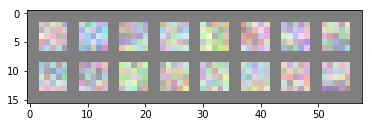

In [89]:
filter1 = convolutional_neural_network.conv1.weight.data
print(filter1.shape)
# vistensor(filter1, ch=0, allkernels=True)
imshow(torchvision.utils.make_grid(filter1, normalize = True))